Discrete distribution:
   * Number of customer complaints
   * Number of calls receied in a call_center per hour
   * Number of food trucks at Travis Park in a day
    
Continuous distribution:
   * Height
   * Temperature
   * Employee salaries
   

### Types of Distributions:
* Uniform distribution
* Normal distribution
* Binomial distribution
* Poisson distribution

More probability distributions: https://en.wikipedia.org/wiki/List_of_probability_distributions
https://www.kdnuggets.com/2020/02/probability-distributions-data-science.html

### Lesson Objectives:
* Understand and recognize these distributions
* Understand parameters

### Uniform Distribution

Rolling a fair 6-sided die
* What does the probability distribution look like:

*** Should insert distribution chart ***

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom

In [10]:
die_distribution = stats.randint(1,7)
die_distribution

#### scipy distribution object: What can we calculate from distribution?
* value -> probability
    - pmf: probability at a particular value of random variable (only for discrete values)
    - pdf: probability at a particular value of random variable (only for continuous values)
    - cdf: cumulative probability for less than or equal to value of random variables.
    - sf: probability for a random variable
* probability -> value
    - ppf: less than or equal to a point
    - isf: greater than a point
* rvs for random values

In [14]:
# what is the probability of rolling a 3?
die_distribution.pmf(3).round(3)

0.167

In [13]:
# What is the probability of rolling 3 or less?
die_distribution.cdf(3)

0.5

In [15]:
# Just inverse of cdf. Given a probability calculate value of random variable
die_distribution.ppf(0.5)

3.0

In [16]:
# What is the likelihood we roll a value higher than 4?
die_distribution.sf(4)

0.33333333333333337

In [17]:
# There is a 1/3 chance a dice roll will be higher than what value
die_distribution.isf(1/3)

4.0

### Examples of uniform distribution in real life:
- rolling a dice
- flipping a coin
- lucky draw

### Normal Distribution
* Bell shaped
* Most observations are closer to the mean
* Common in nature. Examples:
    * Height
    * time a flight takes from point A to B
    * manufacturing
* Two parameters
    * mean(mu)
    * std dev(sigma)

#### Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and a standard deviation of 2000 dollars.
    * What is the probability that sales are 10,000 dollars on a certain day?
    * What is the probability that sales are 10,000 dollars or less on a certain day?
    * What is the probability that sales are greater than 15,000 dollars on a certain day?
    * How much would the daily sales ahve to be to be in the top 10% of all days?

### What is the probability that sales are 10,000 dollars on a certain day?


In [18]:
mean = 12000
std_dev = 2000

sales = stats.norm(mean, std_dev)

In [19]:
sales

In [22]:
sales.pdf(10000)

0.00012098536225957169

### What is the probability that sales are 10,000 dollars or less on a certain day?

In [23]:
sales.cdf(10000)

0.15865525393145707

### What is the probability that sales are greater than 15,000 dollars on a certain day?

In [24]:
sales.sf(15000)

0.06680720126885807

#### Mini Exercise:
The average battery life 

1. What is the probability the cell phone battery lasts more than 16 hours?

In [25]:
μ = 14
σ = 1.5

battery = stats.norm(μ, σ)

In [27]:
battery.sf(16)

0.09121121972586788

In [29]:
# 2. What is the probability that the cell phone battery lasts for exactly 12 hours.

battery.pdf(12).round(3)

0.109

In [30]:
# 3. What is the probability that the cell phone battery lasts for 12 hours or less?
battery.cdf(12)

0.09121121972586788

In [31]:
# 4. How many hours do the battery lasts for top 25% longest lasting phones?
battery.isf(0.25)

15.011734625294123

## Binomial Distribution

Binomial distribution is a discrete probability distribution.

Defined by:
 * Number of trials(sequence of trials)
 * Probability of 'success' in each trial
 


### Assumptions:
 * Two potential outcome per trial
 * Probability of success is same across all trials
 * Each trial is independent

### Example: Suppose we flip a fair coin 5 times in a row. What is probability of getting exactly 1 head.

#### Random variable x = number of heads (success) from flipping a coin 5 times.
What is a trial.
 * Each flip of coin is a trial
 * number of trials = 5

Define what is 'success'.
 * Getting 'heads' in a coin toss
 * probability of success (getting 'heads') = 0.5
 
Total possible outcomes for 5 coin flips = 2.2.2.2.2 = 32

In [32]:
# Binomial Parameters:
n_trials = 5
p = 0.5 # probability of success

flips = stats.binom(n_trials, p)

In [35]:
# probability of getting 0 heads
flips.pmf(0)

0.03125

In [36]:
# probability of getting 2 heads
flips.pmf(2)

0.3125

#### Rigged coin distribution
 * Probability of success (getting 'heads' in a coin toss) = 0.7
 * Number of trials = 5

### Example Binomial distribution:

You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get 11 or more questions right?

In [39]:
# What kind of distribution is this?
# Binomial distribution

# success = answering question correctly

n_trials = 30
p = 0.25

# Random variable x: # Number of questions answered correctly

stats.binom(30, 0.25).sf(10)

0.10572812269266013

### Example 2

Suppose there is a 5% chance that a Codeup student will show up late to class. With a class of 20, what is the likelihood that everyone shows up on time?

success = someone showing up late to the class

In [41]:
# Random variable x?
# Students showing up late

# What kind of distribution is this?
# Binomial distribution

# What are the appropriate defining parameters for this distribution?
n_trials = 20
p = 0.05

stats.binom(n_trials, p).pmf(0)

0.3584859224085422

### Poisson Distribution
 * discrete probability distribution
 * expresses the probability of a given number of events occuring in a fixed interval of time or space
 * no upper bound on number of events (unlike Binomial Distributions)
 * Only one paramter (lambda) which is the rate at which the event happens.

#### Real life examples:
Telecommunications: $ of calls arriving in to customer service.
Astronomy: photons arriving at a telescope
Biology: the number of mutations on a strand of DNA per unit length.
Management: customers arriving at a counter or call centre.
Finance and insurance: number of losses or claims occurring in a given period of time.
Radioactivity: number of decays in a given time interval in a radioactive sample.

### Example

Suppose that astronomers estimate that large meterorites (above a certain size) hit Earth on average once every 100 years (lambda = 1 even per 100 years), and that the number of meteorite hits follows a Poisson distribution.

What is the probability of k = 0 meteorite hits in the next 100 years?

In [42]:
# What kind of distribution is this?
# Poisson distribution

λ = 1 # per 100 years

stats.poisson(λ).pmf(0)

0.36787944117144233

Text(0.5, 1.0, 'Poisson distribution $λ = 100$')

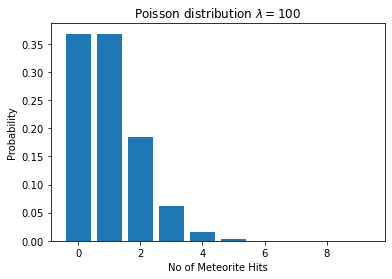

In [46]:
# plot the data
x = np.arange(0,10)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.xlabel('No of Meteorite Hits')
plt.ylabel('Probability')
plt.title('Poisson distribution $λ = 100$')